In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# As a good practice there are 2 sets of dateframe  -  Train and Future_Test
# Train is to build the data model and Future_Test is to test the prediction

In [3]:
# https://www.mygreatlearning.com/gl4l-library/logistic-regression-for-beginners/

In [4]:
train_titanic = pd.read_csv("C:/Users/hp/Downloads/Python Resources and learning Manoj Sir/Machine learning study/titanic_train.csv")

In [5]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


"SibSp" means Siblings ans Spouse; "Pclass" means class of tickets

## Exploratory Data Analysis

In [6]:
# First find the null vlues
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### If we glimpse at the data, we're missing some age information, we're missing a lot of cabin info and we're missing one row of embarked. We'll come back to this problem of missing data a little later. But before that lets focus on some exploratory data analysis on a visual level.

In [7]:
sns.set_style('whitegrid')

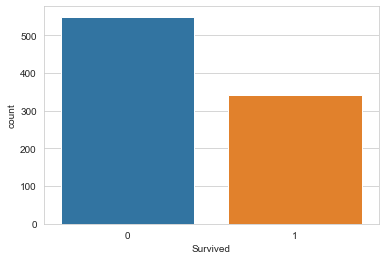

In [8]:
sns.countplot(x= "Survived", data = train_titanic)
# counplot() shows the counts of observations in each categorical bin using bars.
# seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)


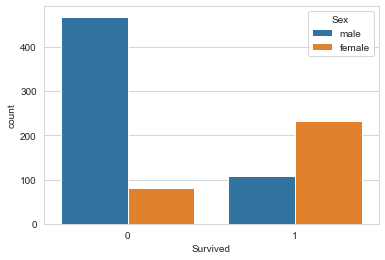

In [9]:
sns.countplot(x= 'Survived', hue = 'Sex', data = train_titanic)
# In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding.

##### Clearly there's a trend here. It looks like people that did not survive were much more likely to be men. While those who survived were twice as likely to be female.

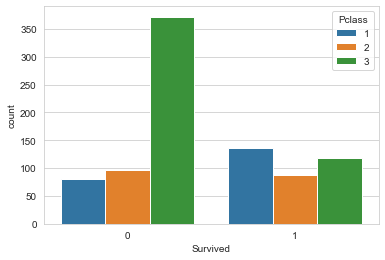

In [10]:
sns.countplot(x= "Survived", hue = "Pclass", data = train_titanic)

Also it looks like the people who did not survive were overwhelmingly part of 3rd class. People that did survive were from the higher classes.

##### Now lets try and understand the age of the onboard passengers.

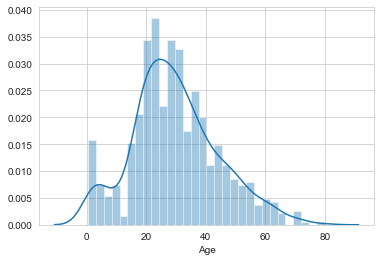

In [11]:
sns.distplot(train_titanic['Age'].dropna(), bins = 30,  kde = True)

# sns.distplot() is to Flexibly plot a univariate(one variable) distribution of observations.
# In other words, It is used basically for univariant set of observations and visualizes it through a histogram i.e. 
# only one observation and hence we choose one particular column of the dataset.

# KDE stands for Kernel Density Estimation and that is another kind of the plot in seaborn. 
# Default value of kde = True. Here in the diagram kde plots the curved line.

There seems to be an interesting bi-modal distribution where there are quite a few young passengers between age 0 and 10. Then the average age tends to be around 20-30.

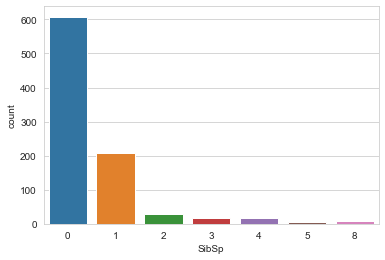

In [12]:
sns.countplot("SibSp", data = train_titanic)

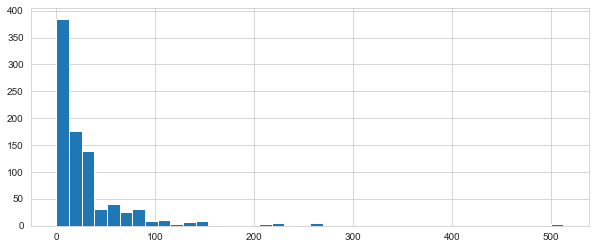

In [13]:
train_titanic['Fare'].hist(bins=40,figsize=(10,4))

## Cleaning the Data

As we saw earlier there are few columns that are missing some data. We need to clean our dataset before we begin to train our logistic regression model. Lets first try and fill in the missing age values. I'm going to do this by filling in the missing age with the mean age of the passenger class that the passenger belongs to.

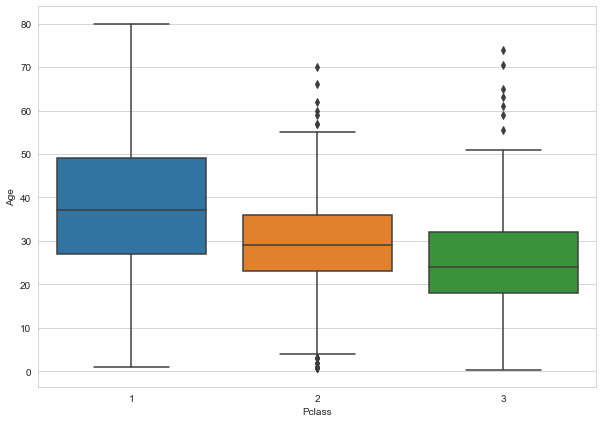

In [14]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train_titanic)

##### There is visible relation between Age and Pclass. For e.g. Most of the young age groups have 3rd class ticket. While many of the passengers in 40s or 50s have 1st class ticket.

In [15]:
train_titanic.groupby('Pclass')['Age'].mean().round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [16]:
mean_all = train_titanic.groupby('Pclass')['Age'].mean().round()
type(mean_all)

pandas.core.series.Series

In [17]:
mean_all.loc[1]

38.0

In [18]:
mean_class1 = mean_all.loc[1]
mean_class2 = mean_all.loc[2]
mean_class3 = mean_all.loc[3]

In [19]:
#xa = train_titanic[train_titanic['Pclass']== 3]['Age'].fillna(mean_class3)

In [20]:
# train_titanic[train_titanic['Pclass']== 3]['Age'].fillna(mean_class3)
# Ask Sir why didnt this work??

In [21]:
#xa

In [22]:
train_titanic['Pclass']==1

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

In [23]:
train_titanic.loc[train_titanic['Pclass']==3, 'Age']

0      22.0
2      26.0
4      35.0
5       NaN
7       2.0
       ... 
882    22.0
884    25.0
885    39.0
888     NaN
890    32.0
Name: Age, Length: 491, dtype: float64

In [24]:
train_titanic.loc[train_titanic['Pclass']==3, 'Age'].fillna(mean_class3)

0      22.0
2      26.0
4      35.0
5      25.0
7       2.0
       ... 
882    22.0
884    25.0
885    39.0
888    25.0
890    32.0
Name: Age, Length: 491, dtype: float64

In [25]:
train_titanic.loc[train_titanic['Pclass']==1, 'Age'] = train_titanic.loc[train_titanic['Pclass']==1, 'Age'].fillna(mean_class1)
train_titanic.loc[train_titanic['Pclass']==2, 'Age'] = train_titanic.loc[train_titanic['Pclass']==2, 'Age'].fillna(mean_class2)
train_titanic.loc[train_titanic['Pclass']==3, 'Age'] = train_titanic.loc[train_titanic['Pclass']==3, 'Age'].fillna(mean_class3)

In [26]:
# Now we will check the dataset with the help of heatmap.

# A heat map is data analysis software that uses color the way a bar graph uses height and width: as a data visualization tool.
# A heat map (or heatmap) is a graphical representation of data where values are depicted by color. 
# Heat maps make it easy to visualize complex data and understand it at a glance.

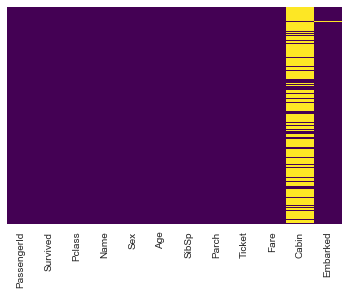

In [27]:
sns.heatmap(train_titanic.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')

# Ask Sir What are ytick labels here. I tried it shows numbers. But what about words. how it will here??
# yticks are index or serial numbers

I'm going to just drop the cabin column since there's too much missing information.

In [28]:
# No need of 'Cabin' column so we will drop it.

train_titanic.drop('Cabin', axis =1, inplace =True)

In [29]:
# Dropping row where there is one missing value in embarked column
train_titanic.dropna(inplace= True)

I will now convert some of the categorical features in the dataset into dummy variables that our machine learning model can accept.

In [30]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
sex = pd.get_dummies(train_titanic['Sex'], drop_first = True)

In [32]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [33]:
train_titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
embark = pd.get_dummies(train_titanic['Embarked'], drop_first =True)

In [35]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [36]:
train_titanic = pd.concat([train_titanic, sex, embark], axis =1)

In [37]:
train_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [38]:
# Dropping the unwanted columns
train_titanic.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis =1, inplace =True)

In [39]:
train_titanic.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [40]:
# Dropping passenger ID also..
train_titanic.drop('PassengerId', axis =1, inplace =True)

In [41]:
train_titanic.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


##### Now lets perform similar data cleaning on the future_test data.

In [42]:
future_test = pd.read_csv("C:/Users/hp/Downloads/Python Resources and learning Manoj Sir/Machine learning study/titanic_test.csv")

In [43]:
future_test.loc[future_test['Pclass']==1,'Age'] = future_test.loc[future_test['Pclass']==1,'Age'].fillna(value=mean_class1)
future_test.loc[future_test['Pclass']==2,'Age'] = future_test.loc[future_test['Pclass']==2,'Age'].fillna(value=mean_class2)
future_test.loc[future_test['Pclass']==3,'Age'] = future_test.loc[future_test['Pclass']==3,'Age'].fillna(value=mean_class3)

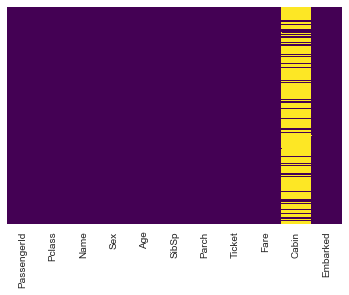

In [44]:
sns.heatmap(future_test.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [45]:
future_test.drop('Cabin', axis =1, inplace= True)

In [46]:
future_test.dropna(inplace= True)

In [47]:
sex = pd.get_dummies(future_test['Sex'], drop_first = True)
embark = pd.get_dummies(future_test['Embarked'], drop_first= True)

In [48]:
future_test = pd.concat([future_test, sex, embark], axis =1)

In [49]:
future_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [50]:
# train_titanic.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis =1, inplace =True)

future_test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis =1, inplace =True)

In [51]:
future_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [52]:
train_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [53]:
# Comparing above two data sets we can see that except PassengerID column all data is same. 
# We will delete this column later because for making predictions the dataset structure should be same.

## Building Data Model - Train and build classifier

In [54]:
train_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [55]:
train_titanic.shape

(889, 9)

In [56]:
X = train_titanic.drop('Survived', axis=1)  # independent variable
Y = train_titanic['Survived']               # dependent variable

In [57]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [58]:
# We will ...

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train70, X_test30, Y_train70, Y_test30 = train_test_split(X, Y, test_size = 0.3, random_state = 101)

# train_test_split splits arrays or matrices into random train and test subsets. 
# 70-30%, 70-30%
# That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.
# So, random_state fixes the random result.
# Here test_size =0.3 means that we are splitting 30% of the data into test data for testing

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression()
logmodel.fit(X_train70, Y_train70)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
logmodel.score(X_train70, Y_train70)

0.797427652733119

In [64]:
logmodel.score(X_test30, Y_test30)

0.8314606741573034

In [65]:
Y_test30.head()  
# This is actual result of 30% data. We compare this data with result of prediction on the 30% data i.e. X_test30

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

In [66]:
# Making prediction on 30% test data:

In [67]:
X_test30.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,25.0,0,0,8.05,1,0,1
613,3,25.0,0,0,7.75,1,1,0
615,2,24.0,1,2,65.00,0,0,1
337,1,41.0,0,0,134.50,0,0,0
718,3,25.0,0,0,15.50,1,1,0


In [68]:
pred30 = logmodel.predict(X_test30)

In [69]:
pred30

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [81]:
len(pred30)

267

In [70]:
test_prediction30 = pd.DataFrame({'Survived_prediction30':pred30})
test_prediction30

,Survived_prediction30
0,0
1,0
2,1
3,1
4,0
...,...
262,0
263,0
264,0
265,1


In [80]:
sum(pred30)

85

In [71]:
# And this is the actual result with which we can compare
Y_test30

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [79]:
# Creating Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# results = confusion_matrix(actual, predicted)    In O/P actual is row and predicted is column
results30 = confusion_matrix(Y_test30, pred30)
print('Confusion Matrix:\n', results30)

print ('Accuracy Score :', accuracy_score(Y_test30, pred30)) 


Confusion Matrix:
 [[150  13]
 [ 32  72]]
Accuracy Score : 0.8314606741573034


## Making Predictions

In [72]:
future_test.shape

(417, 9)

In [73]:
t1 = future_test.drop('PassengerId', axis =1)

In [74]:
t1.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [75]:
predictions = logmodel.predict(t1)

In [76]:
final_prediction = pd.DataFrame({'PassengerId':future_test['PassengerId'],'Survived':predictions})

In [77]:
final_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
